# üëâüèª Í∏∞Î≥∏ ÏÑ∏ÌåÖ

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import squarify 
import warnings
from matplotlib.gridspec import GridSpec
%matplotlib inline

def get_font_family():
    """
    ÏãúÏä§ÌÖú ÌôòÍ≤ΩÏóê Îî∞Î•∏ Í∏∞Î≥∏ Ìè∞Ìä∏Î™ÖÏùÑ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()

font_family = get_font_family()
# Ìè∞Ìä∏ÏÑ§Ï†ï
plt.rc('font', family=font_family)
# ÎßàÏù¥ÎÑàÏä§Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('axes', unicode_minus=False)
# ggplotÏúºÎ°ú Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('ggplot')
# Í∑∏ÎûòÌîÑÏóê retina display Ï†ÅÏö©
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

warnings.filterwarnings(action='ignore')

„ÄÄ

# üëâüèª Îç∞Ïù¥ÌÑ∞ Î°úÎî©
* (brandnmÏóê Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏö¥ DB)

In [2]:
df = pd.read_excel('./data/closet_share_ÏàòÏ†ï.xlsx', engine='openpyxl')
df

brandnm                                    goodsnm  \
0                   Gucci         flower dionysus shoulder bag beige   
1     El estilo de Claire                 beads cropped jacket black   
2                   Danha  embroidery point oriental mini skirt blue   
3                   Danha                  graphics pattern top pink   
4         Burberry London     buckle basic pattern zipup-jumper navy   
...                   ...                                        ...   
1466   Yves Saint Laurent                 logo point clutch bag pink   
1467                Prada                        saffiano lux M gray   
1468             Burberry                basic pattern sweater beige   
1469               Chanel        graphics pattern sweat-shirts white   
1470             Burberry                  classic trench coat beige   

          USER   reg_date order_date p_type sub_type app_yn  
0      a161237 2019-12-06 2021-01-15  7days       BA      Y  
1     a1140859 2021-01-02 2021-01-15  4days        O   None  
2     a1140859 2021-01-02 2021-01-15  4days        B   None  
3     a1140859 2021-01-02 2021-01-15  4days        T   None  
4     a1140740 2021-01-01 2021-01-15  7days        O      Y  
...        ...        ...        ...    ...      ...    ...  
1466   a119721 2019-04-10 2021-03-01  7days       BA      Y  
1467  a1146069 2021-02-11 2021-03-01  7days       BA      Y  
1468  a1147848 2021-02-28 2021-03-01  7days        T      Y  
1469  a1147788 2021-02-28 2021-03-01  7days        T      Y  
1470   a190054 2020-03-24 2021-03-01  4days        O      Y  

[1471 rows x 8 columns]

„ÄÄ

# üëâüèª Feature ÏÉùÏÑ± Î∞è ÏàòÏ†ï

## 1Ô∏è‚É£ ÌïúÍ∏ÄÎ™Ö Ï†úÌíà ÌÉÄÏûÖ

In [3]:
sub_type = {'O':'ÏïÑÏö∞ÌÑ∞', 'T':'ÏÉÅÏùò', 'B':'ÌïòÏùò', 'TP':'Ìà¨ÌîºÏä§', 'D':'ÎìúÎ†àÏä§', 'BA':'Í∞ÄÎ∞©'}
def sub_type_map(x):
    return sub_type[x]

df['ÌÉÄÏûÖ']= df['sub_type'].map(sub_type_map)


## 2Ô∏è‚É£ ÎÇ†Ïßú feature ÏàòÏ†ï Î∞è Ï∂îÍ∞Ä

In [4]:
df['reg_date'] = pd.to_datetime(df['reg_date'])
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month
df['day'] =  df['order_date'].dt.day

## 3Ô∏è‚É£ app_yn ÏàòÏ†ï : nan Îç∞Ïù¥ÌÑ∞ NÏúºÎ°ú Ï±ÑÏö∞Í∏∞

In [5]:
df['app_yn'] = df['app_yn'].fillna('N')

„ÄÄ

## üëâüèª Ïú†Ï†ÄÎ≥Ñ ÎåÄÏó¨ ÌòÑÌô© (50Í∞úÏùò Ïú†Ï†ÄÍ∞Ä 2Í∞ú Ïù¥ÏÉÅ Ï£ºÎ¨∏)

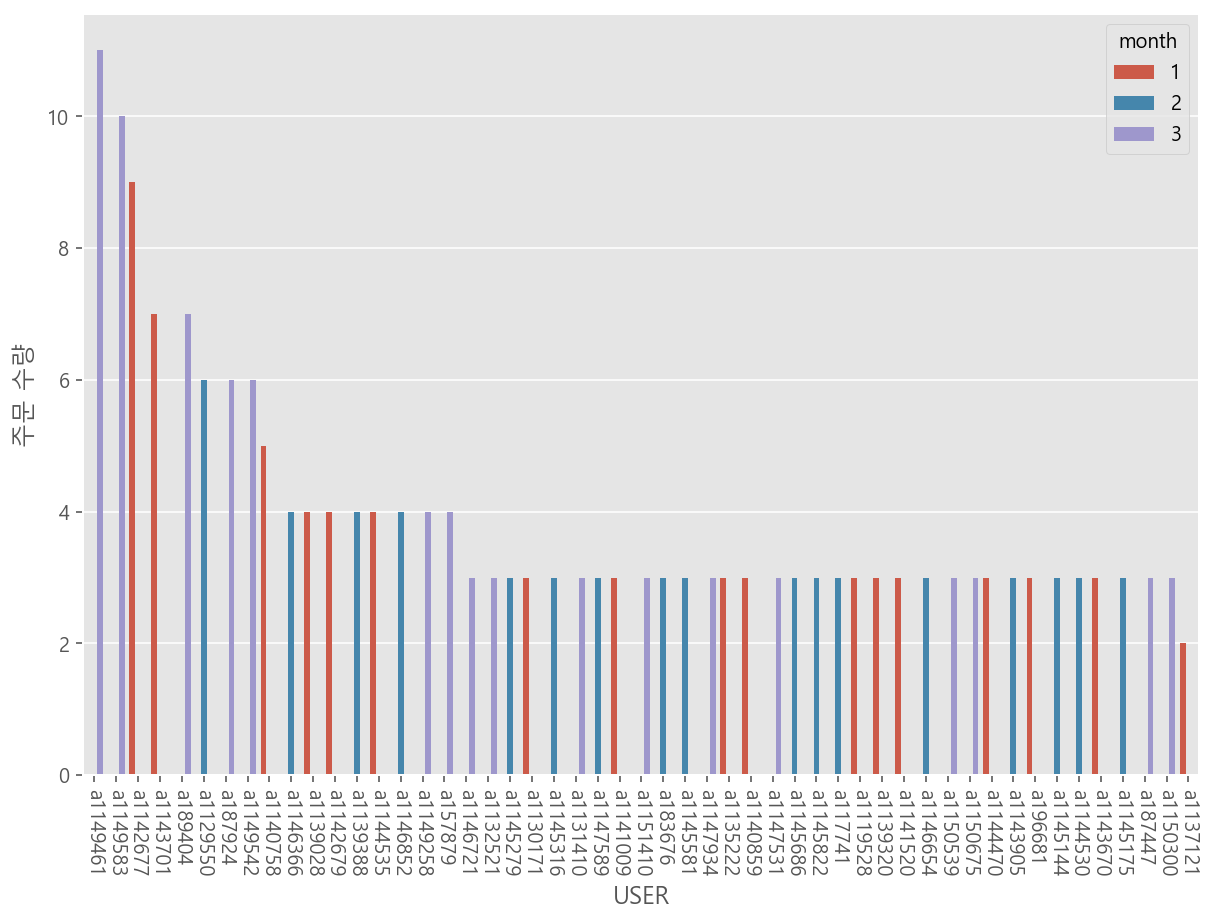

In [6]:
df_cross = pd.crosstab(df['USER'], df['month'])
df_cross['sum']= df_cross.sum(axis=1)
df_cross = df_cross.sort_values('sum', ascending=False)
df_cross['month'] = 0
for i in range(df_cross.shape[0]):
    if df_cross.iloc[i, 0]!=0:
        df_cross.iloc[i,-1]= 1
    elif df_cross.iloc[i, 1]!=0:
        df_cross.iloc[i,-1]= 2
    elif df_cross.iloc[i, 2]!=0:
        df_cross.iloc[i,-1]= 3
plt.figure(figsize=(10,7))
sns.barplot(data=df_cross[:51],x=df_cross.index[:51],  y=df_cross.iloc[:51, :]['sum'],hue='month')
plt.ylabel('Ï£ºÎ¨∏ ÏàòÎüâ')
plt.xticks(rotation=270)
plt.show()

„ÄÄ

## üëâüèª ÏõîÎ≥Ñ ÎåÄÏó¨ ÌòÑÌô© (ÏùºÎ≥Ñ count Í≥ÑÏÇ∞)

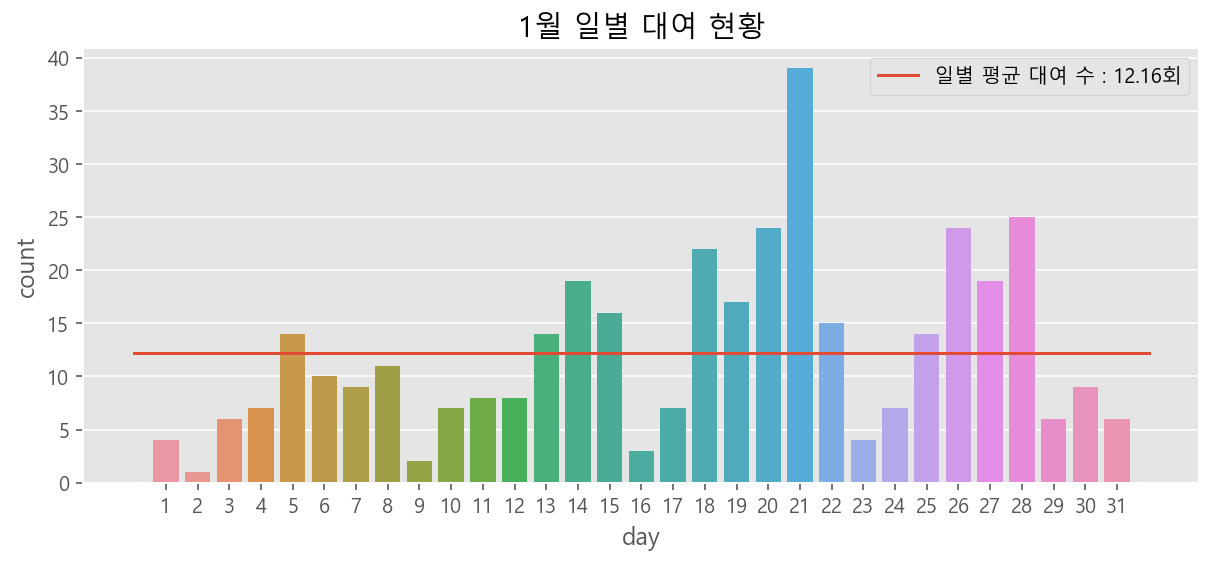

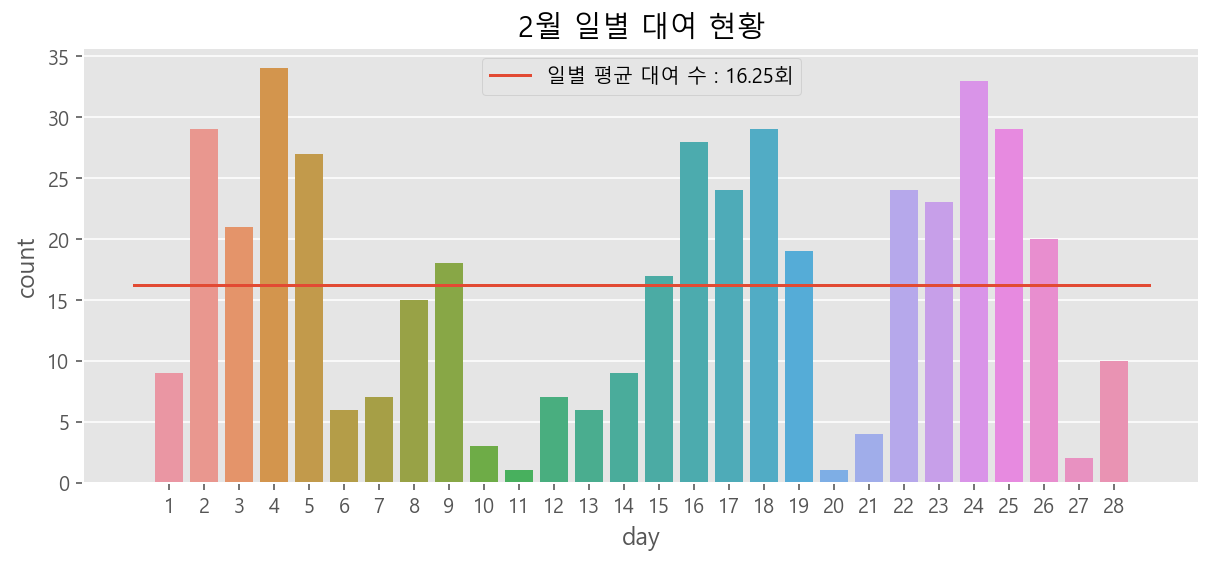

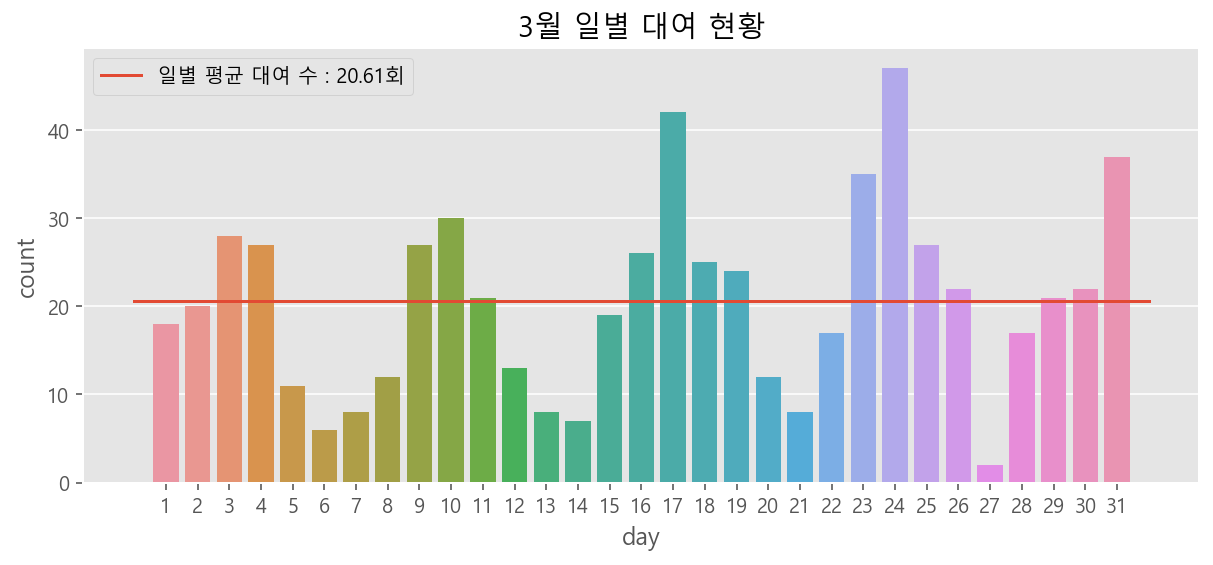

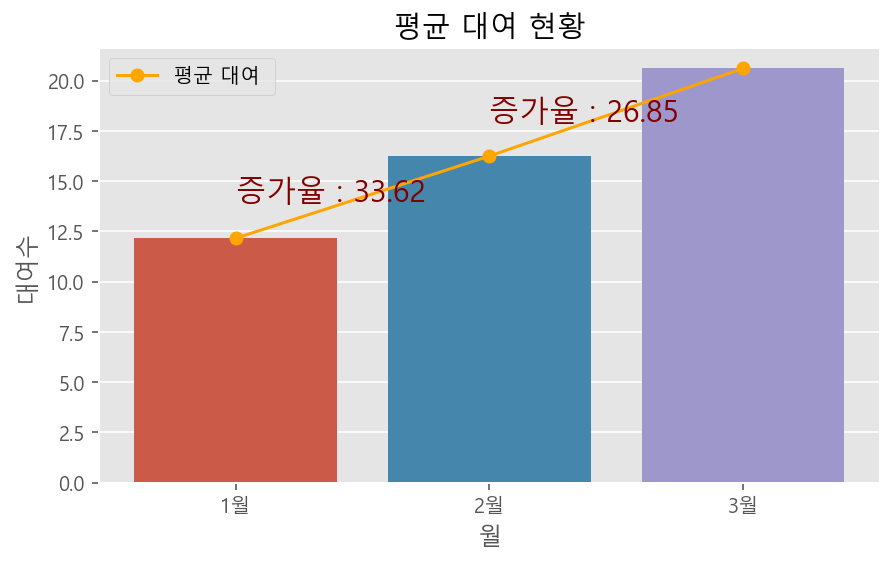

In [7]:
## ÏõîÎ≥Ñ dataframe
df_month1 = df[df['month']==1].sort_values('day')
df_month2 = df[df['month']==2].sort_values('day')
df_month3 = df[df['month']==3].sort_values('day')

# ÏõîÎ≥Ñ figure
plt.figure(figsize=(10,4))
m1 = df_month1.groupby('day').count()['goodsnm'].mean()
sns.countplot(data=df_month1, x ='day')
plt.plot(range(-1, 32), 33*[m1], label =f'ÏùºÎ≥Ñ ÌèâÍ∑† ÎåÄÏó¨ Ïàò : {round(m1,2)}Ìöå')
plt.title('1Ïõî ÏùºÎ≥Ñ ÎåÄÏó¨ ÌòÑÌô©')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
m2 = df_month2.groupby('day').count()['goodsnm'].mean()
sns.countplot(data=df_month2, x ='day')
plt.plot(range(-1, 29), 30*[m2], label =f'ÏùºÎ≥Ñ ÌèâÍ∑† ÎåÄÏó¨ Ïàò : {round(m2,2)}Ìöå')
plt.title('2Ïõî ÏùºÎ≥Ñ ÎåÄÏó¨ ÌòÑÌô©')
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
m3 = df_month3.groupby('day').count()['goodsnm'].mean()
sns.countplot(data=df_month3, x ='day')
plt.plot(range(-1, 32), 33*[m3], label =f'ÏùºÎ≥Ñ ÌèâÍ∑† ÎåÄÏó¨ Ïàò : {round(m3,2)}Ìöå')
plt.title('3Ïõî ÏùºÎ≥Ñ ÎåÄÏó¨ ÌòÑÌô©')
plt.legend()
plt.show()

# ÌèâÍ∑† dataframe
df_mean = pd.DataFrame(data = [[m1, m2, m3] ], columns=['1Ïõî', '2Ïõî', '3Ïõî'], index=['ÌèâÍ∑†'])

# ÏõîÎ≥Ñ Î≥ÄÌôîÎüâ Í∑∏ÎûòÌîÑ
val1 = round((df_mean.loc['ÌèâÍ∑†', '2Ïõî']/df_mean.loc['ÌèâÍ∑†', '1Ïõî'] -1) * 100, 2)
val2 = round((df_mean.loc['ÌèâÍ∑†', '3Ïõî']/df_mean.loc['ÌèâÍ∑†', '2Ïõî'] -1) * 100, 2)
plt.figure(figsize=(7,4))
sns.barplot(data=df_mean.loc[['ÌèâÍ∑†'], :])
plt.plot(df_mean.columns, df_mean.loc['ÌèâÍ∑†'], 'o-',color='orange', label='ÌèâÍ∑† ÎåÄÏó¨ ')
plt.text(0., 14, f'Ï¶ùÍ∞ÄÏú® : {val1}', fontsize=15, color ='maroon')
plt.text(1, 18, f'Ï¶ùÍ∞ÄÏú® : {val2}', fontsize=15, color ='maroon')

plt.xlabel('Ïõî')
plt.ylabel('ÎåÄÏó¨Ïàò')
plt.title('ÌèâÍ∑† ÎåÄÏó¨ ÌòÑÌô©')
plt.legend()
plt.show()
# print('2Ïõî Ï¶ùÍ∞ÄÏú® :', (df_mean.loc['ÌèâÍ∑†', '2Ïõî']/df_mean.loc['ÌèâÍ∑†', '1Ïõî'] -1) * 100)
# print('3Ïõî Ï¶ùÍ∞ÄÏú® :', (df_mean.loc['ÌèâÍ∑†', '3Ïõî']/df_mean.loc['ÌèâÍ∑†', '2Ïõî'] -1) * 100)

„ÄÄ

## üëâüèª p_typeÎ≥Ñ Ïõî ÎåÄÏó¨ ÌòÑÌô©

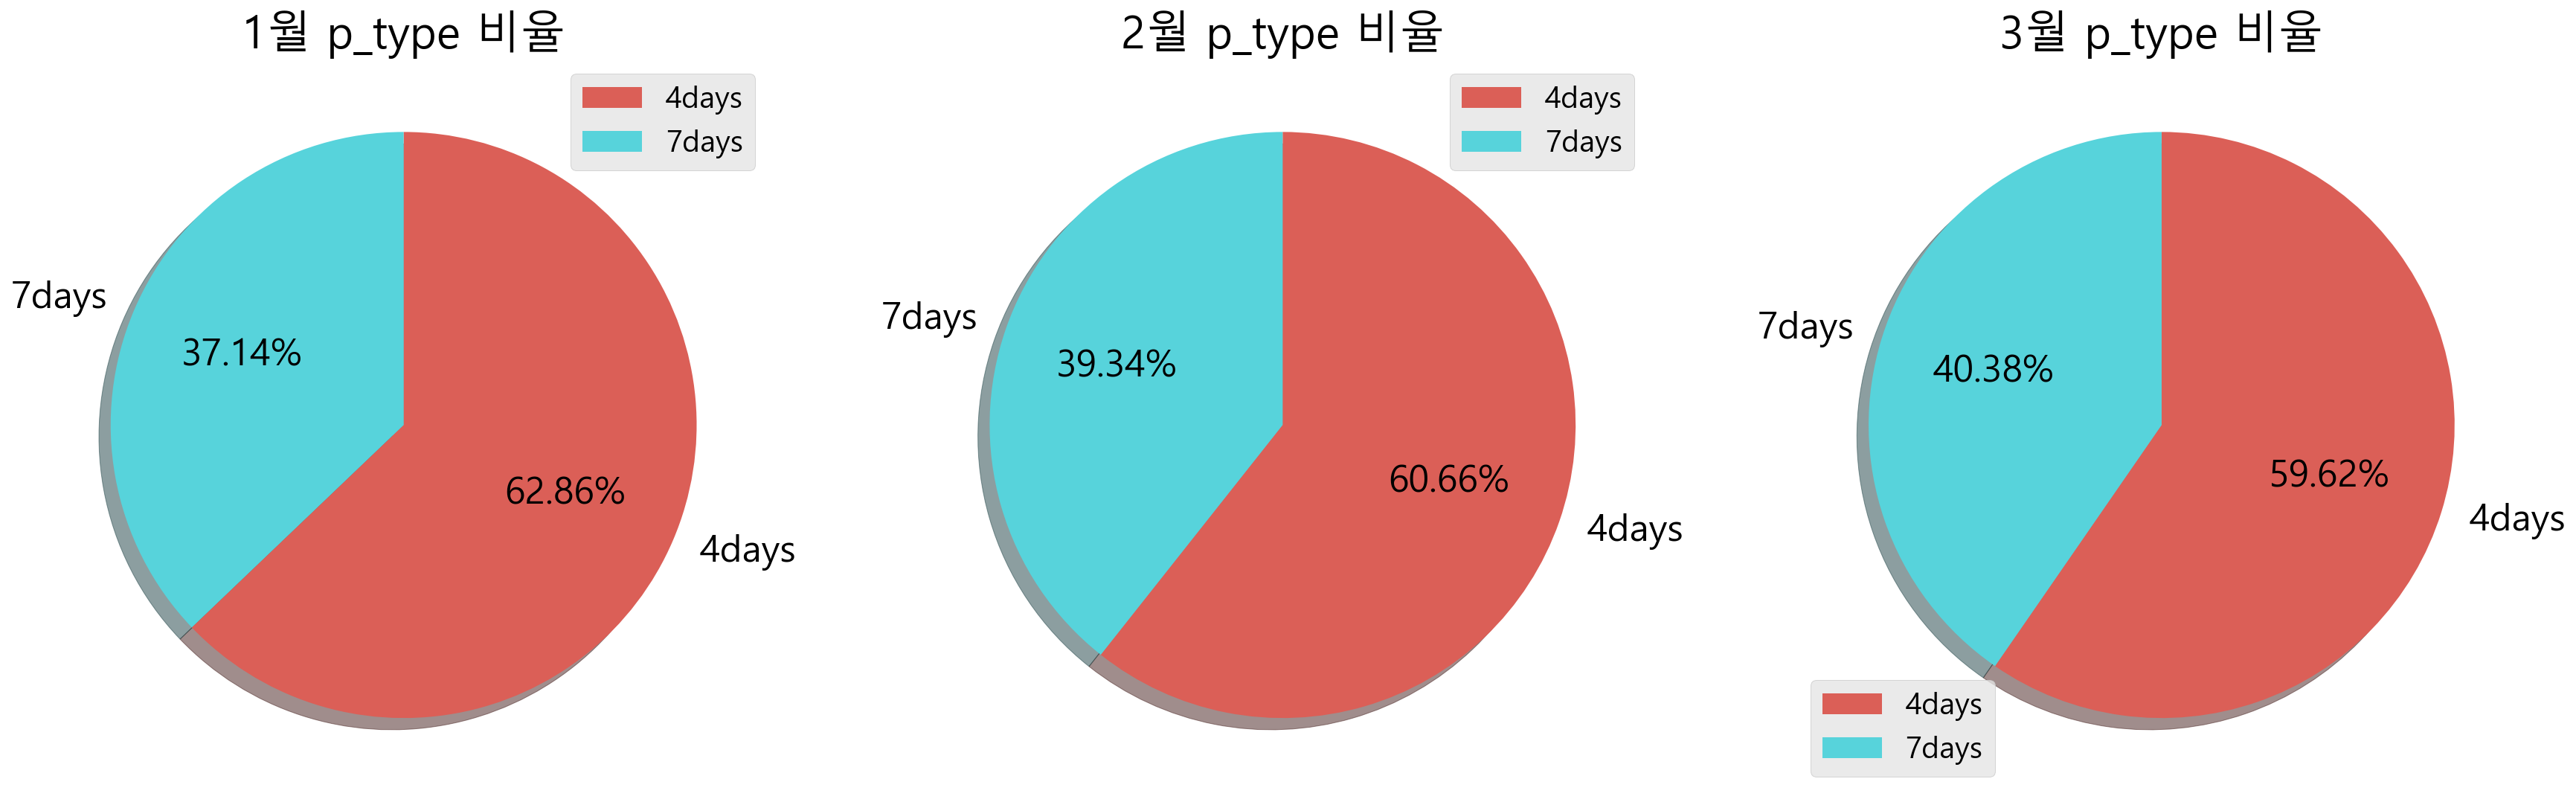

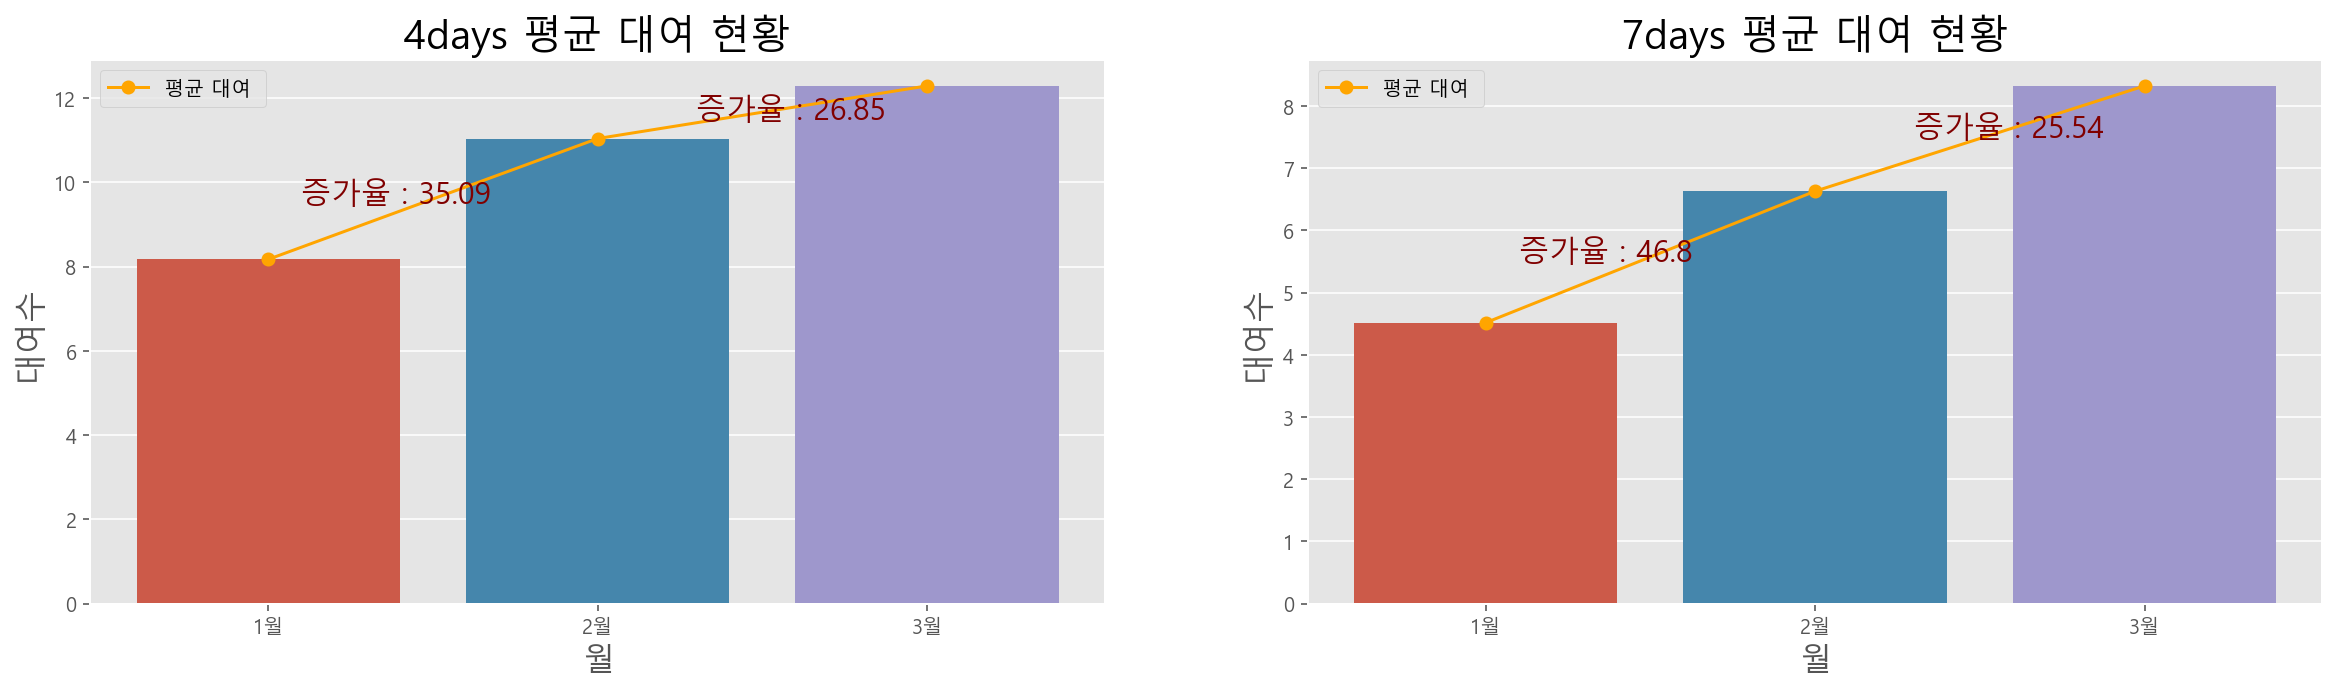

In [8]:
## month/p_type Î≥Ñ dataframe
df_month1_4days = df_month1[df_month1['p_type']=='4days'].sort_values('day')
df_month1_7days = df_month1[df_month1['p_type']=='7days'].sort_values('day')

df_month2_4days = df_month2[df_month2['p_type']=='4days'].sort_values('day')
df_month2_7days = df_month2[df_month2['p_type']=='7days'].sort_values('day')

df_month3_4days = df_month3[df_month3['p_type']=='4days'].sort_values('day')
df_month3_7days = df_month3[df_month3['p_type']=='7days'].sort_values('day')



# ÌèâÍ∑† dataframe
m14 = (df_month1[df_month1['p_type']=='4days'].groupby('day').count()['goodsnm'].mean())
m17 = (df_month1[df_month1['p_type']=='7days'].groupby('day').count()['goodsnm'].mean())

m24 = (df_month2[df_month2['p_type']=='4days'].groupby('day').count()['goodsnm'].mean())
m27 = (df_month2[df_month2['p_type']=='7days'].groupby('day').count()['goodsnm'].mean())

m34 = (df_month3[df_month3['p_type']=='4days'].groupby('day').count()['goodsnm'].mean())
m37 = (df_month3[df_month3['p_type']=='7days'].groupby('day').count()['goodsnm'].mean())

df_mean.loc['4days ÌèâÍ∑†', ['1Ïõî', '2Ïõî', '3Ïõî']] = [m14, m24, m34]
df_mean.loc['7days ÌèâÍ∑†', ['1Ïõî', '2Ïõî', '3Ïõî']] = [m17, m27, m37]


## ÌååÏù¥ Ï∞®Ìä∏
labels = ['4days', '7days']
colors = sns.color_palette('hls', len(labels))
fig = plt.figure(figsize=(30,10))
fig.set_facecolor('white')

fig.add_subplot(1,3,1)
frequency1 = [df_month1_4days.shape[0], df_month1_7days.shape[0]]
pie1 = plt.pie(frequency1, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('1Ïõî p_type ÎπÑÏú®', fontsize=30)

fig.add_subplot(1,3,2)
frequency2 = [df_month2_4days.shape[0], df_month2_7days.shape[0]]
pie2 = plt.pie(frequency2, 
       startangle=90,
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('2Ïõî p_type ÎπÑÏú®', fontsize=30)

fig.add_subplot(1,3,3)
frequency3 = [df_month3_4days.shape[0], df_month3_7days.shape[0]]
pie3 = plt.pie(frequency3, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('3Ïõî p_type ÎπÑÏú®', fontsize=30)
plt.show()


## ÎßâÎåÄ Í∑∏ÎûòÌîÑ
fig = plt.figure(figsize=(20,5))
gs = GridSpec(1,2)
sns.barplot(data=df_mean.loc[['4days ÌèâÍ∑†'], :], ax = fig.add_subplot(gs[0,0]))
plt.plot(df_mean.columns, df_mean.loc['4days ÌèâÍ∑†'], 'o-', color='orange', label='ÌèâÍ∑† ÎåÄÏó¨ ')
plt.xlabel('Ïõî', fontsize=16)
plt.ylabel('ÎåÄÏó¨Ïàò', fontsize=16)
plt.title('4days ÌèâÍ∑† ÎåÄÏó¨ ÌòÑÌô©', fontsize=20)

val11 = round((df_mean.loc['4days ÌèâÍ∑†', '2Ïõî']/df_mean.loc['4days ÌèâÍ∑†', '1Ïõî'] -1) * 100, 2)
val12 = round((df_mean.loc['ÌèâÍ∑†', '3Ïõî']/df_mean.loc['ÌèâÍ∑†', '2Ïõî'] -1) * 100, 2)

plt.text(0.1, 9.5, f'Ï¶ùÍ∞ÄÏú® : {val11}', fontsize=15, color ='maroon')
plt.text(1.3, 11.5, f'Ï¶ùÍ∞ÄÏú® : {val12}', fontsize=15, color ='maroon')

plt.legend()

sns.barplot(data=df_mean.loc[['7days ÌèâÍ∑†'], :], ax = fig.add_subplot(gs[0,1]))
plt.plot(df_mean.columns, df_mean.loc['7days ÌèâÍ∑†'], 'o-', color='orange', label='ÌèâÍ∑† ÎåÄÏó¨ ')
plt.xlabel('Ïõî', fontsize=16)
plt.ylabel('ÎåÄÏó¨Ïàò', fontsize=16)

val21 = round((df_mean.loc['7days ÌèâÍ∑†', '2Ïõî']/df_mean.loc['7days ÌèâÍ∑†', '1Ïõî'] -1) * 100, 2)
val22 = round((df_mean.loc['7days ÌèâÍ∑†', '3Ïõî']/df_mean.loc['7days ÌèâÍ∑†', '2Ïõî'] -1) * 100, 2)

plt.text(0.1, 5.5, f'Ï¶ùÍ∞ÄÏú® : {val21}', fontsize=15, color ='maroon')
plt.text(1.3, 7.5, f'Ï¶ùÍ∞ÄÏú® : {val22}', fontsize=15, color ='maroon')
plt.title('7days ÌèâÍ∑† ÎåÄÏó¨ ÌòÑÌô©', fontsize=20)
plt.legend()

plt.show()

„ÄÄ

## üëâüèª APP/WEB Ïõî ÎåÄÏó¨ ÌòÑÌô©

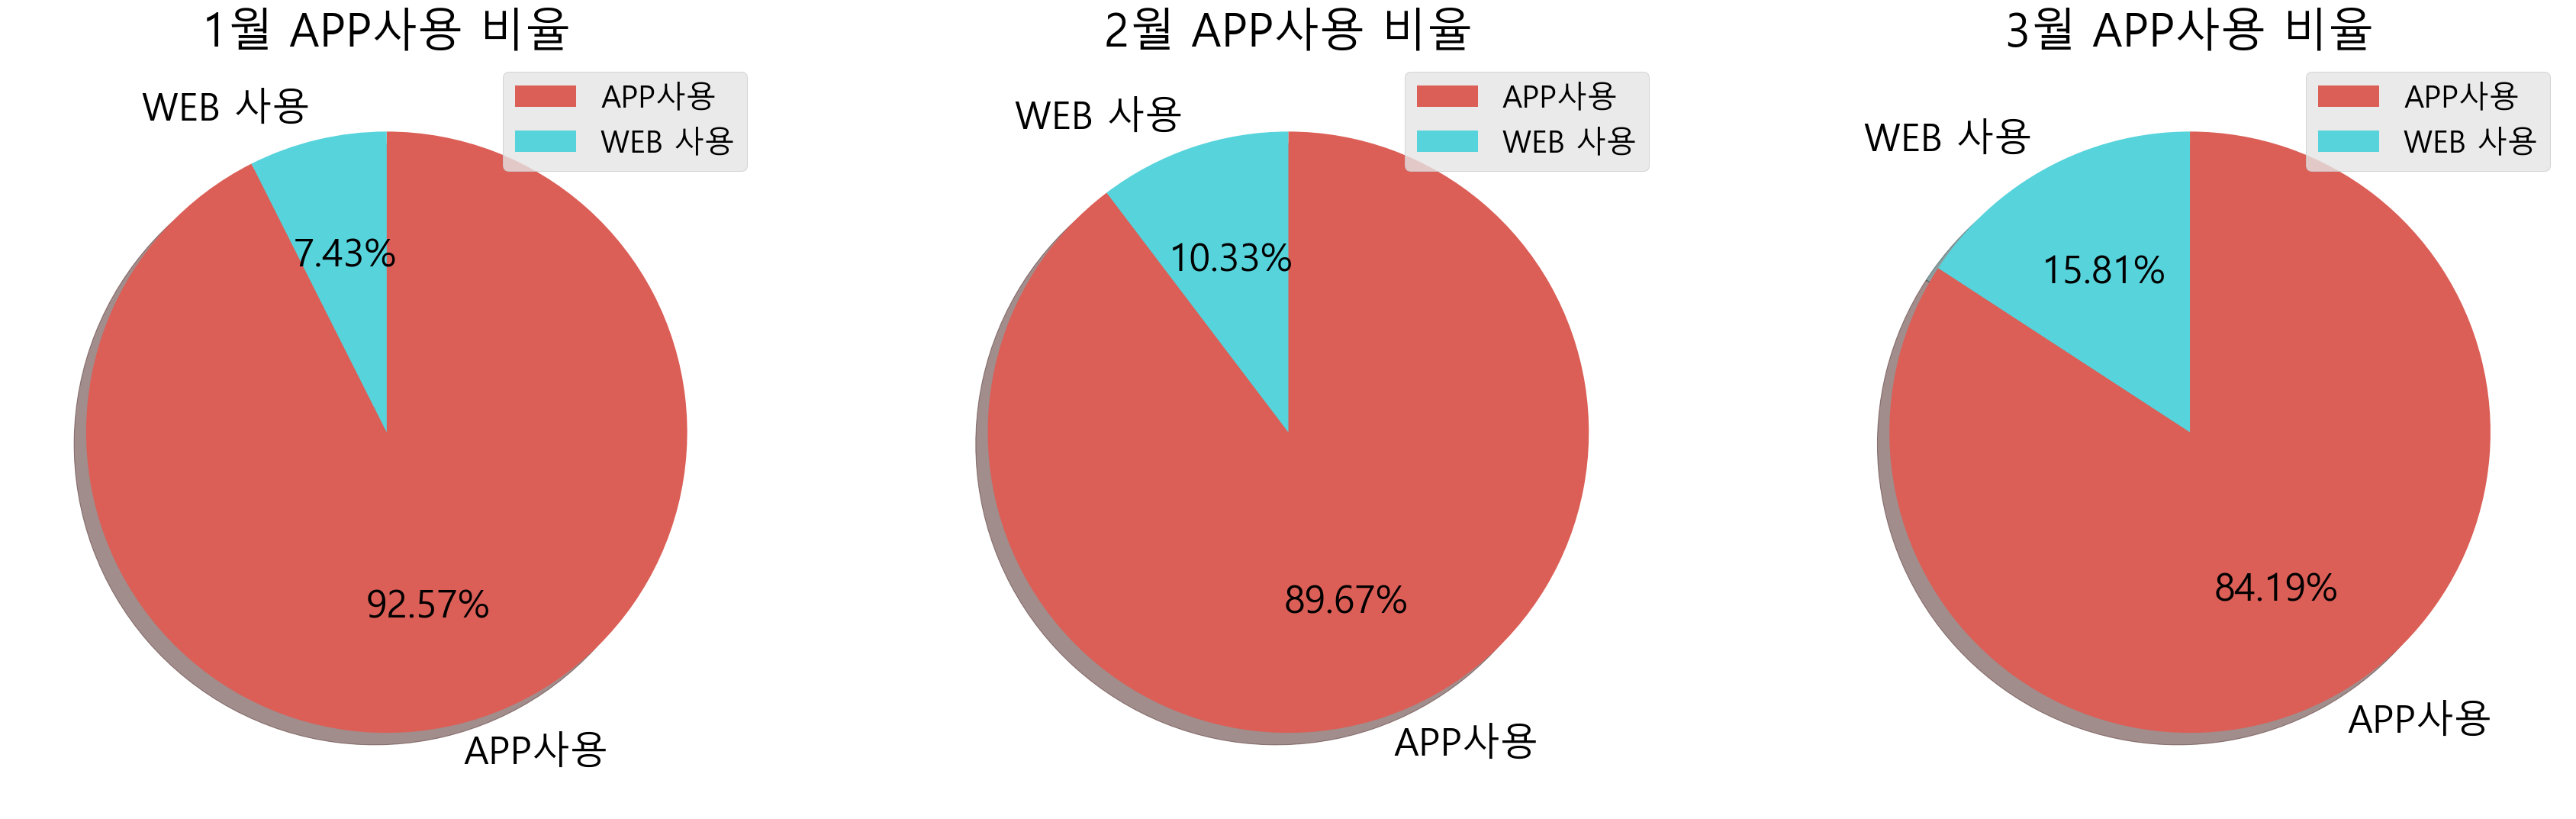

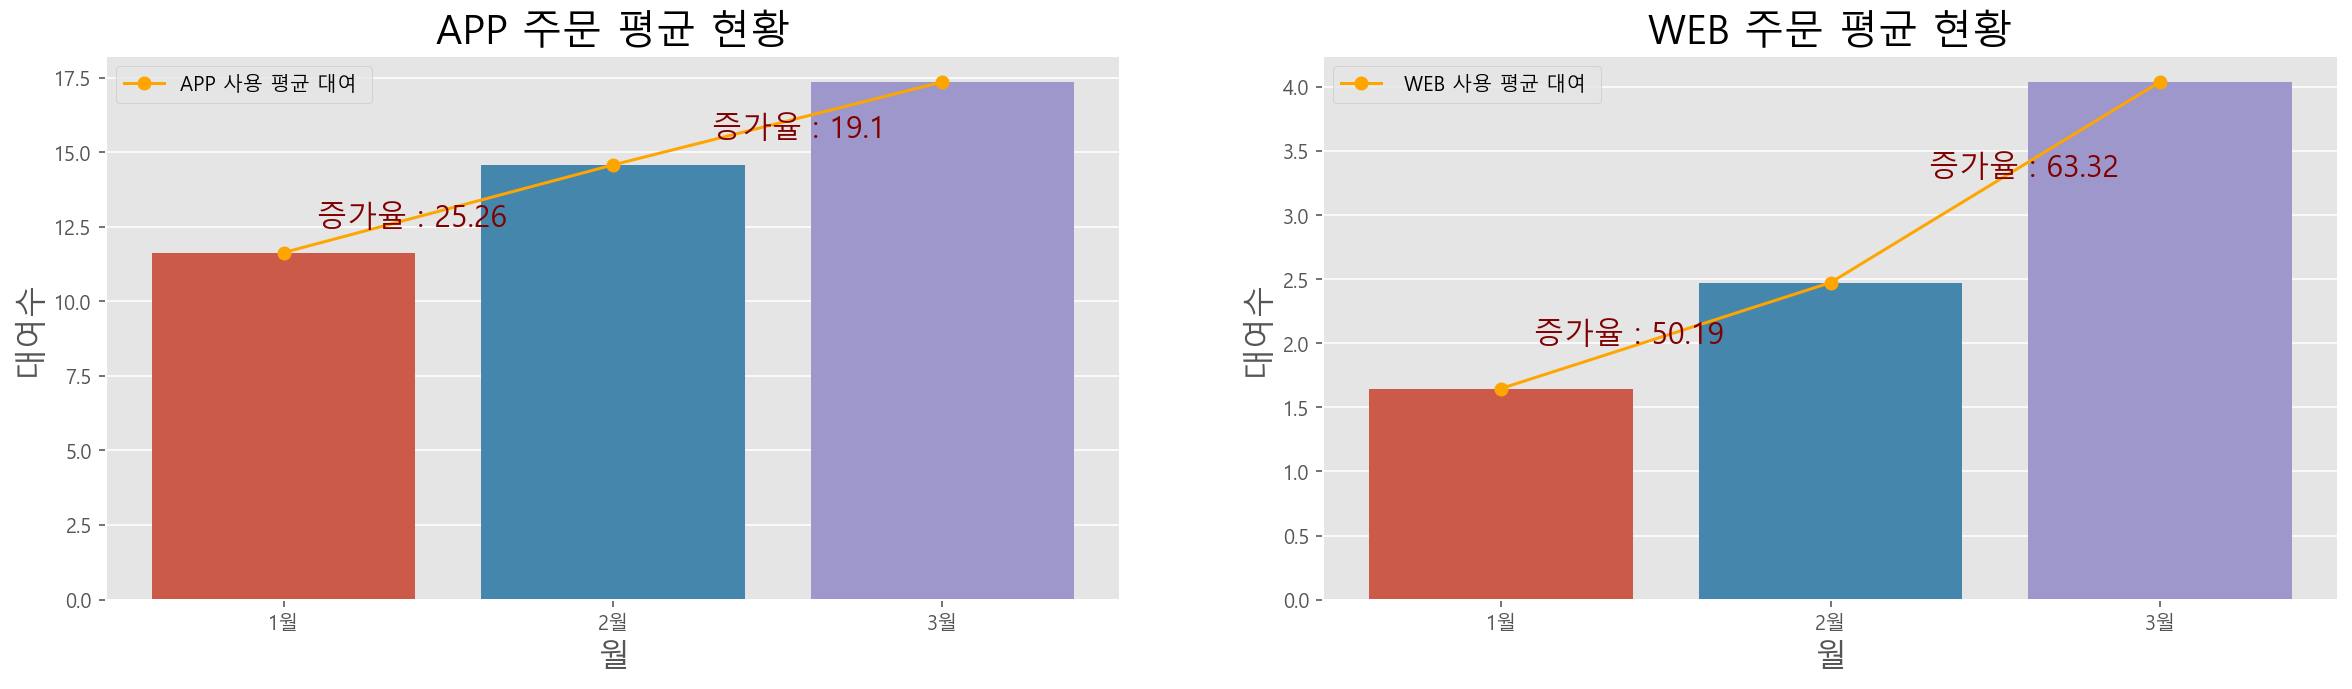

In [9]:
## app dataframe
df_month1_app = df_month1[df_month1['app_yn']=='Y'].sort_values('day')
df_month1_web = df_month1[df_month1['app_yn']=='N'].sort_values('day')

df_month2_app = df_month2[df_month2['app_yn']=='Y'].sort_values('day')
df_month2_web = df_month2[df_month2['app_yn']=='N'].sort_values('day')

df_month3_app = df_month3[df_month3['app_yn']=='Y'].sort_values('day')
df_month3_web = df_month3[df_month3['app_yn']=='N'].sort_values('day')


## ÌèâÍ∑† dataframe
m1y = (df_month1[df_month1['app_yn']=='Y'].groupby('day').count()['goodsnm'].mean())
m1n = (df_month1[df_month1['app_yn']=='N'].groupby('day').count()['goodsnm'].mean())

m2y = (df_month2[df_month2['app_yn']=='Y'].groupby('day').count()['goodsnm'].mean())
m2n = (df_month2[df_month2['app_yn']=='N'].groupby('day').count()['goodsnm'].mean())

m3y = (df_month3[df_month3['app_yn']=='Y'].groupby('day').count()['goodsnm'].mean())
m3n = (df_month3[df_month3['app_yn']=='N'].groupby('day').count()['goodsnm'].mean())

df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', ['1Ïõî', '2Ïõî', '3Ïõî']] = [m1y, m2y, m3y]
df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', ['1Ïõî', '2Ïõî', '3Ïõî']] = [m1n, m2n, m3n]


## ÌååÏù¥ Ï∞®Ìä∏
labels = ['APPÏÇ¨Ïö©', 'WEB ÏÇ¨Ïö©']
colors = sns.color_palette('hls', len(labels))
fig = plt.figure(figsize=(30,10))
fig.set_facecolor('white')

fig.add_subplot(1,3,1)
frequency1 = [df_month1_app.shape[0], df_month1_web.shape[0]]
pie1 = plt.pie(frequency1, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('1Ïõî APPÏÇ¨Ïö© ÎπÑÏú®', fontsize=30)

fig.add_subplot(1,3,2)
frequency2 = [df_month2_app.shape[0], df_month2_web.shape[0]]
pie2 = plt.pie(frequency2, 
       startangle=90,         
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('2Ïõî APPÏÇ¨Ïö© ÎπÑÏú®', fontsize=30)

fig.add_subplot(1,3,3)
frequency3 = [df_month3_app.shape[0], df_month3_web.shape[0]]
pie3 = plt.pie(frequency3, 
       startangle=90,
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('3Ïõî APPÏÇ¨Ïö© ÎπÑÏú®', fontsize=30)
plt.show()


## ÎßâÎåÄ Í∑∏ÎûòÌîÑ
fig = plt.figure(figsize=(20,5))
gs = GridSpec(1,2)
sns.barplot(data=df_mean.loc[['APP ÏÇ¨Ïö© ÌèâÍ∑†'], :], ax = fig.add_subplot(gs[0,0]))
plt.plot(df_mean.columns, df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†'], 'o-', color='orange', label='APP ÏÇ¨Ïö© ÌèâÍ∑† ÎåÄÏó¨ ')
plt.xlabel('Ïõî', fontsize=16)
plt.ylabel('ÎåÄÏó¨Ïàò', fontsize=16)
plt.title('APP Ï£ºÎ¨∏ ÌèâÍ∑† ÌòÑÌô©', fontsize=20)

val11 = round((df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî']/df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '1Ïõî'] -1) * 100, 2)
val12 = round((df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '3Ïõî']/df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî'] -1) * 100, 2)
plt.text(0.1, 12.5, f'Ï¶ùÍ∞ÄÏú® : {val11}', fontsize=15, color ='maroon')
plt.text(1.3, 15.5, f'Ï¶ùÍ∞ÄÏú® : {val12}', fontsize=15, color ='maroon')
plt.legend()

sns.barplot(data=df_mean.loc[['WEB ÏÇ¨Ïö© ÌèâÍ∑†'], :], ax = fig.add_subplot(gs[0,1]))
plt.plot(df_mean.columns, df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†'], 'o-', color='orange', label=' WEB ÏÇ¨Ïö© ÌèâÍ∑† ÎåÄÏó¨ ')
plt.xlabel('Ïõî', fontsize=16)
plt.ylabel('ÎåÄÏó¨Ïàò', fontsize=16)
plt.title('WEB Ï£ºÎ¨∏ ÌèâÍ∑† ÌòÑÌô©', fontsize=20)

val21 = round((df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî']/df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '1Ïõî'] -1) * 100, 2)
val22 = round((df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '3Ïõî']/df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî'] -1) * 100, 2)
plt.text(0.1, 2, f'Ï¶ùÍ∞ÄÏú® : {val21}', fontsize=15, color ='maroon')
plt.text(1.3, 3.3, f'Ï¶ùÍ∞ÄÏú® : {val22}', fontsize=15, color ='maroon')
plt.legend()

plt.show()
# print('APP ÏÇ¨Ïö© 2Ïõî Ï¶ùÍ∞ÄÏú® :', (df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî']/df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '1Ïõî'] -1) * 100)
# print('APP ÏÇ¨Ïö© 3Ïõî Ï¶ùÍ∞ÄÏú® :', (df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '3Ïõî']/df_mean.loc['APP ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî'] -1) * 100)
# print('')
# print('WEB ÏÇ¨Ïö© 2Ïõî Ï¶ùÍ∞ÄÏú® :', (df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî']/df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '1Ïõî'] -1) * 100)
# print('WEB ÏÇ¨Ïö© 3Ïõî Ï¶ùÍ∞ÄÏú® :', (df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '3Ïõî']/df_mean.loc['WEB ÏÇ¨Ïö© ÌèâÍ∑†', '2Ïõî'] -1) * 100)

„ÄÄ

## üëâüèª Ï†úÌíà ÌÉÄÏûÖÎ≥Ñ ÎåÄÏó¨ ÌòÑÌô©

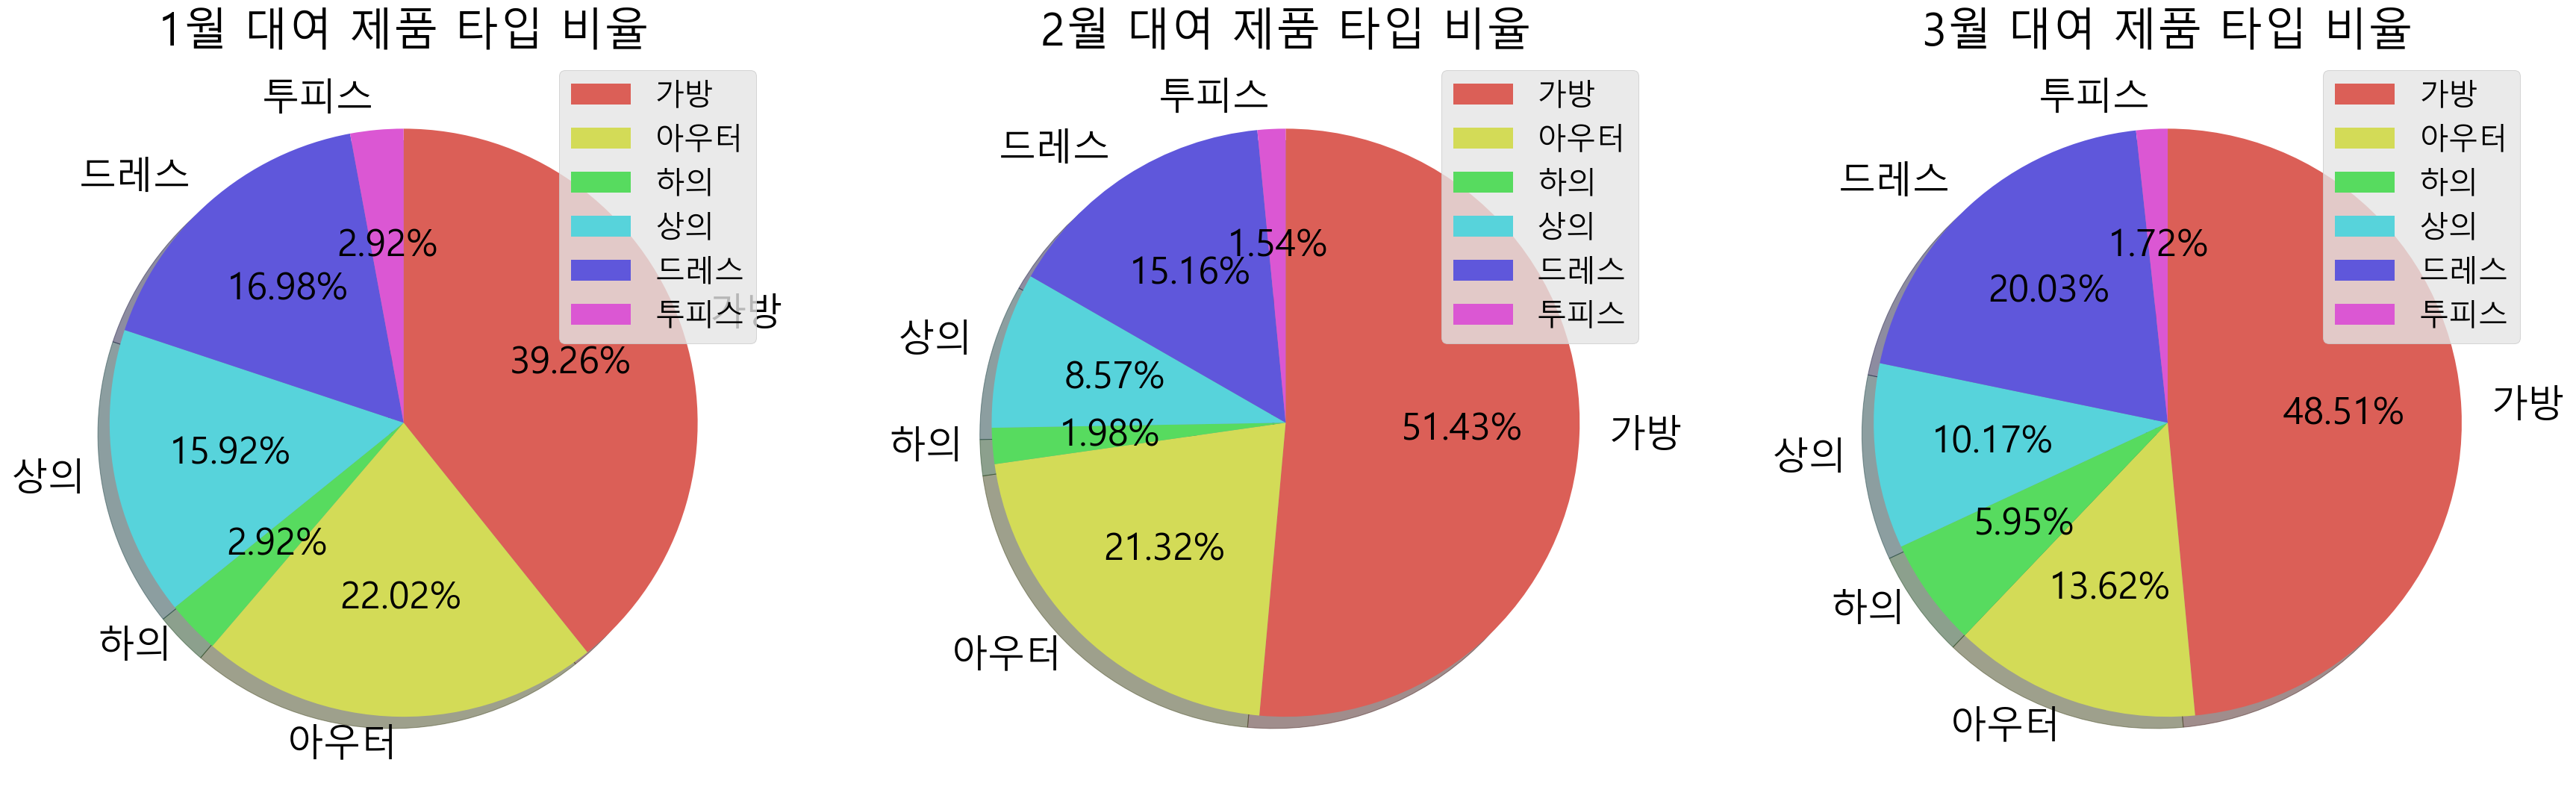

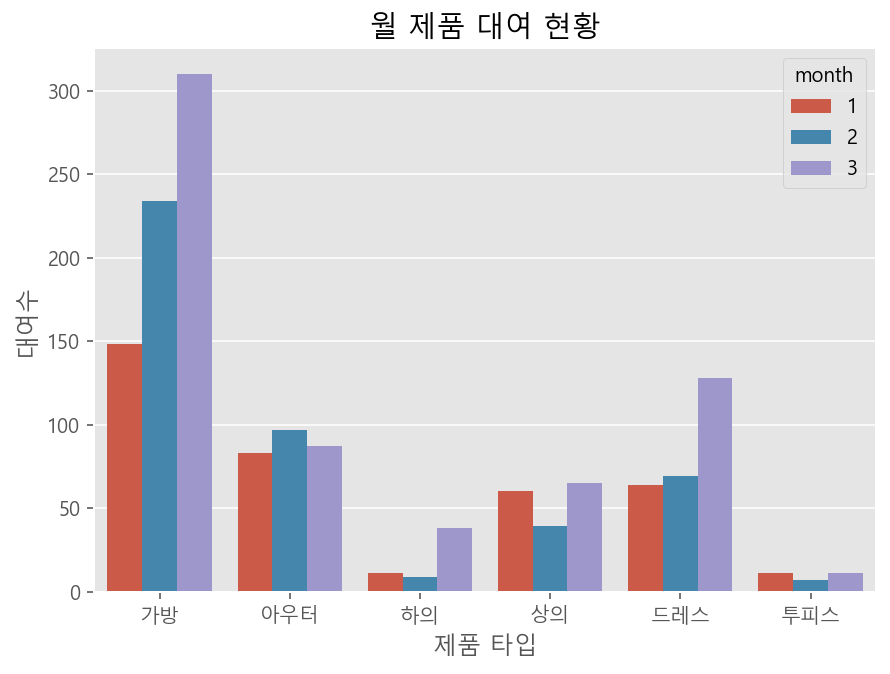

In [10]:
## Ï†úÌíà dataframe
df_month1_ba = df_month1[df_month1['ÌÉÄÏûÖ']=='Í∞ÄÎ∞©'].sort_values('day')
df_month1_o = df_month1[df_month1['ÌÉÄÏûÖ']=='ÏïÑÏö∞ÌÑ∞'].sort_values('day')
df_month1_b = df_month1[df_month1['ÌÉÄÏûÖ']=='ÌïòÏùò'].sort_values('day')
df_month1_t = df_month1[df_month1['ÌÉÄÏûÖ']=='ÏÉÅÏùò'].sort_values('day')
df_month1_d = df_month1[df_month1['ÌÉÄÏûÖ']=='ÎìúÎ†àÏä§'].sort_values('day')
df_month1_tp = df_month1[df_month1['ÌÉÄÏûÖ']=='Ìà¨ÌîºÏä§'].sort_values('day')

df_month2_ba = df_month2[df_month2['ÌÉÄÏûÖ']=='Í∞ÄÎ∞©'].sort_values('day')
df_month2_o = df_month2[df_month2['ÌÉÄÏûÖ']=='ÏïÑÏö∞ÌÑ∞'].sort_values('day')
df_month2_b = df_month2[df_month2['ÌÉÄÏûÖ']=='ÌïòÏùò'].sort_values('day')
df_month2_t = df_month2[df_month2['ÌÉÄÏûÖ']=='ÏÉÅÏùò'].sort_values('day')
df_month2_d = df_month2[df_month2['ÌÉÄÏûÖ']=='ÎìúÎ†àÏä§'].sort_values('day')
df_month2_tp = df_month2[df_month2['ÌÉÄÏûÖ']=='Ìà¨ÌîºÏä§'].sort_values('day')

df_month3_ba = df_month3[df_month3['ÌÉÄÏûÖ']=='Í∞ÄÎ∞©'].sort_values('day')
df_month3_o = df_month3[df_month3['ÌÉÄÏûÖ']=='ÏïÑÏö∞ÌÑ∞'].sort_values('day')
df_month3_b = df_month3[df_month3['ÌÉÄÏûÖ']=='ÌïòÏùò'].sort_values('day')
df_month3_t = df_month3[df_month3['ÌÉÄÏûÖ']=='ÏÉÅÏùò'].sort_values('day')
df_month3_d = df_month3[df_month3['ÌÉÄÏûÖ']=='ÎìúÎ†àÏä§'].sort_values('day')
df_month3_tp = df_month3[df_month3['ÌÉÄÏûÖ']=='Ìà¨ÌîºÏä§'].sort_values('day')


## ÌååÏù¥Ï∞®Ìä∏
labels = ['Í∞ÄÎ∞©', 'ÏïÑÏö∞ÌÑ∞', 'ÌïòÏùò', 'ÏÉÅÏùò', 'ÎìúÎ†àÏä§', 'Ìà¨ÌîºÏä§']
colors = sns.color_palette('hls', len(labels))
fig = plt.figure(figsize=(30,10))
fig.set_facecolor('white')

fig.add_subplot(1,3,1)
frequency1 = [df_month1_ba.shape[0], df_month1_o.shape[0], df_month1_b.shape[0], df_month1_t.shape[0], df_month1_d.shape[0], df_month1_tp.shape[0]]
pie1 = plt.pie(frequency1, 
       startangle=90, 
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('1Ïõî ÎåÄÏó¨ Ï†úÌíà ÌÉÄÏûÖ ÎπÑÏú®', fontsize=30)

fig.add_subplot(1,3,2)
frequency2 = [df_month2_ba.shape[0], df_month2_o.shape[0], df_month2_b.shape[0], df_month2_t.shape[0], df_month2_d.shape[0], df_month2_tp.shape[0]]
pie2 = plt.pie(frequency2, 
       startangle=90,         
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('2Ïõî ÎåÄÏó¨ Ï†úÌíà ÌÉÄÏûÖ ÎπÑÏú®', fontsize=30)

fig.add_subplot(1,3,3)
frequency3 = [df_month3_ba.shape[0], df_month3_o.shape[0], df_month3_b.shape[0], df_month3_t.shape[0], df_month3_d.shape[0], df_month3_tp.shape[0]]
pie3 = plt.pie(frequency3, 
       startangle=90,
       shadow=True, 
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p),
       colors = colors,
       labels = labels,
       textprops={'fontsize': 25}
       )
plt.legend(fontsize=20)
plt.title('3Ïõî ÎåÄÏó¨ Ï†úÌíà ÌÉÄÏûÖ ÎπÑÏú®', fontsize=30)
plt.show()


## ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='ÌÉÄÏûÖ', hue='month')
plt.title('Ïõî Ï†úÌíà ÎåÄÏó¨ ÌòÑÌô©')
plt.xlabel('Ï†úÌíà ÌÉÄÏûÖ')
plt.ylabel('ÎåÄÏó¨Ïàò')
plt.show()

„ÄÄ

## üëâüèª ÏûÖÏ†ê Ï∂îÏ≤ú Î∏åÎûúÎìú
* DATA : ÌÅ¥Î°úÏ†Ø ÏÖ∞Ïñ¥ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÎåÄÏó¨Îêú Ï†úÌíà Ï¥ù 26Í∞ú (Î™®Îëê 5Ìöå Ïù¥ÏÉÅ)

In [11]:
df_add= pd.read_csv('./data/closet_additionaldata1.csv')
df_add

Unnamed: 0  Unnamed: 0.1                                  goodsnm  \
0            0             0          chevron quilted cross bag black   
1            1             1                     classic clutch black   
2            2             2                  boy chanel clutch black   
3            3             3           padlock GG canvas shoulder bag   
4            4             4              mini sunset chain bag black   
5            5             5                       epi tote bag black   
6            6             6              dionysus shoulder bag beige   
7            7             7                 dionysus cross bag beige   
8            8             8                    monogram clutch brown   
9            9             9                     flap cross bag black   
10          10            10          microssima emily mini bag black   
11          11            11           mammont chain wallet bag black   
12          12            12                        luggage bag black   
13          13            13               alma epi pm tote bag black   
14          14            14           vintage web shoulder bag black   
15          15            15          chevron pattern chain bag beige   
16          16            16             logo pointed cross bag black   
17          17            17                   mamont chain bag black   
18          18            18  dionysos velvet chain shoulder bag navy   
19          19            19                   logo pointed cross bag   
20          20            20      sylvie leather mini chain bag black   
21          21            21              monogram shoulder bag black   
22          22            22            monogram cross body bag black   
23          23            23        marmont GG logo quilted bag black   
24          24            24            quilted calfskin shoulder bag   
25          25            25        mamont chain mini cross bag black   

               brandnm  Record Count   ÏÉÅÌÉú                 ÌÉúÍ∑∏  ÏÇ¨Ïù¥Ï¶à        ÏÜåÏû¨  \
0        Saint Laurent            23  4.0   #Ïò§ÌîºÏä§ #ÏúÑÏºÑÎìú #Ìè¨Î©ÄÏù¥Î≤§Ìä∏    M  ÏÜ°ÏïÑÏßÄ Í∞ÄÏ£Ω\r   
1               Chanel            12  4.0             #Ìè¨Î©ÄÏù¥Î≤§Ìä∏    M       ÏñëÍ∞ÄÏ£Ω   
2               Chanel            11  4.0        #ÏúÑÏºÑÎìú #Ìè¨Î©ÄÏù¥Î≤§Ìä∏    M      ÏóºÏÜåÍ∞ÄÏ£Ω   
3                Gucci             9  3.0        #Ïò§ÌîºÏä§ #ÏúÑÏºÑÎìú\r    S       Ìå®Î∏åÎ¶≠   
4        Saint Laurent             8  3.0             #Ïò§ÌîºÏä§\r    M  ÏÜ°ÏïÑÏßÄ Í∞ÄÏ£Ω\r   
5        Louis Vuitton             8  3.0               #Ïò§ÌîºÏä§    M       ÏÜåÍ∞ÄÏ£Ω   
6                Gucci             8  3.0             #ÏúÑÏºÑÎìú\r    S       Ìå®Î∏åÎ¶≠   
7                Gucci             7  4.0             #ÏúÑÏºÑÎìú\r    S       Ìå®Î∏åÎ¶≠   
8        Louis Vuitton             7  4.0             #ÏúÑÏºÑÎìú\r    M     Ìå®Î∏åÎ¶≠\r   
9                Gucci             7  4.0             #Ïò§ÌîºÏä§\r    M       ÏÜåÍ∞ÄÏ£Ω   
10               Gucci             6  4.0      #Ïò§ÌîºÏä§ #Ìè¨Î©ÄÏù¥Î≤§Ìä∏\r    M       ÏÜåÍ∞ÄÏ£Ω   
11               Gucci             6  3.0  #Ïò§ÌîºÏä§ #Ìè¨Î©ÄÏù¥Î≤§Ìä∏ #ÌååÌã∞\r    S    ÏÜ°ÏïÑÏßÄ Í∞ÄÏ£Ω   
12              Celine             5  4.0        #Ïò§ÌîºÏä§ #Ìè¨Î©ÄÏù¥Î≤§Ìä∏    L    ÏÜ°ÏïÑÏßÄ Í∞ÄÏ£Ω   
13       Louis Vuitton             5  3.0        #Ïò§ÌîºÏä§ #Ìè¨Î©ÄÏù¥Î≤§Ìä∏    M       ÌååÏù¥ÌÜ§   
14               Gucci             5  4.0   #Ïò§ÌîºÏä§ #ÏúÑÏºÑÎìú #Ìè¨Î©ÄÏù¥Î≤§Ìä∏    M       ÏÜåÍ∞ÄÏ£Ω   
15  Yves Saint Laurent             5  3.0      #Î°úÎß®Ìã± #ÏúÑÏºÑÎìú #ÌååÌã∞    M    ÏÜ°ÏïÑÏßÄ Í∞ÄÏ£Ω   
16               Gucci             5  4.0               #Ïò§ÌîºÏä§    S       ÏÜåÍ∞ÄÏ£Ω   
17               Gucci             5  4.0        #Ïò§ÌîºÏä§ #Ìè¨Î©ÄÏù¥Î≤§Ìä∏    S       ÏÜåÍ∞ÄÏ£Ω   
18               Gucci             5  4.0          #Ïò§ÌîºÏä§ #ÏúÑÏºÑÎìú    M      Ïä§Ïõ®Ïù¥Îìú   
19               Gucci             5  4.0               #Ïò§

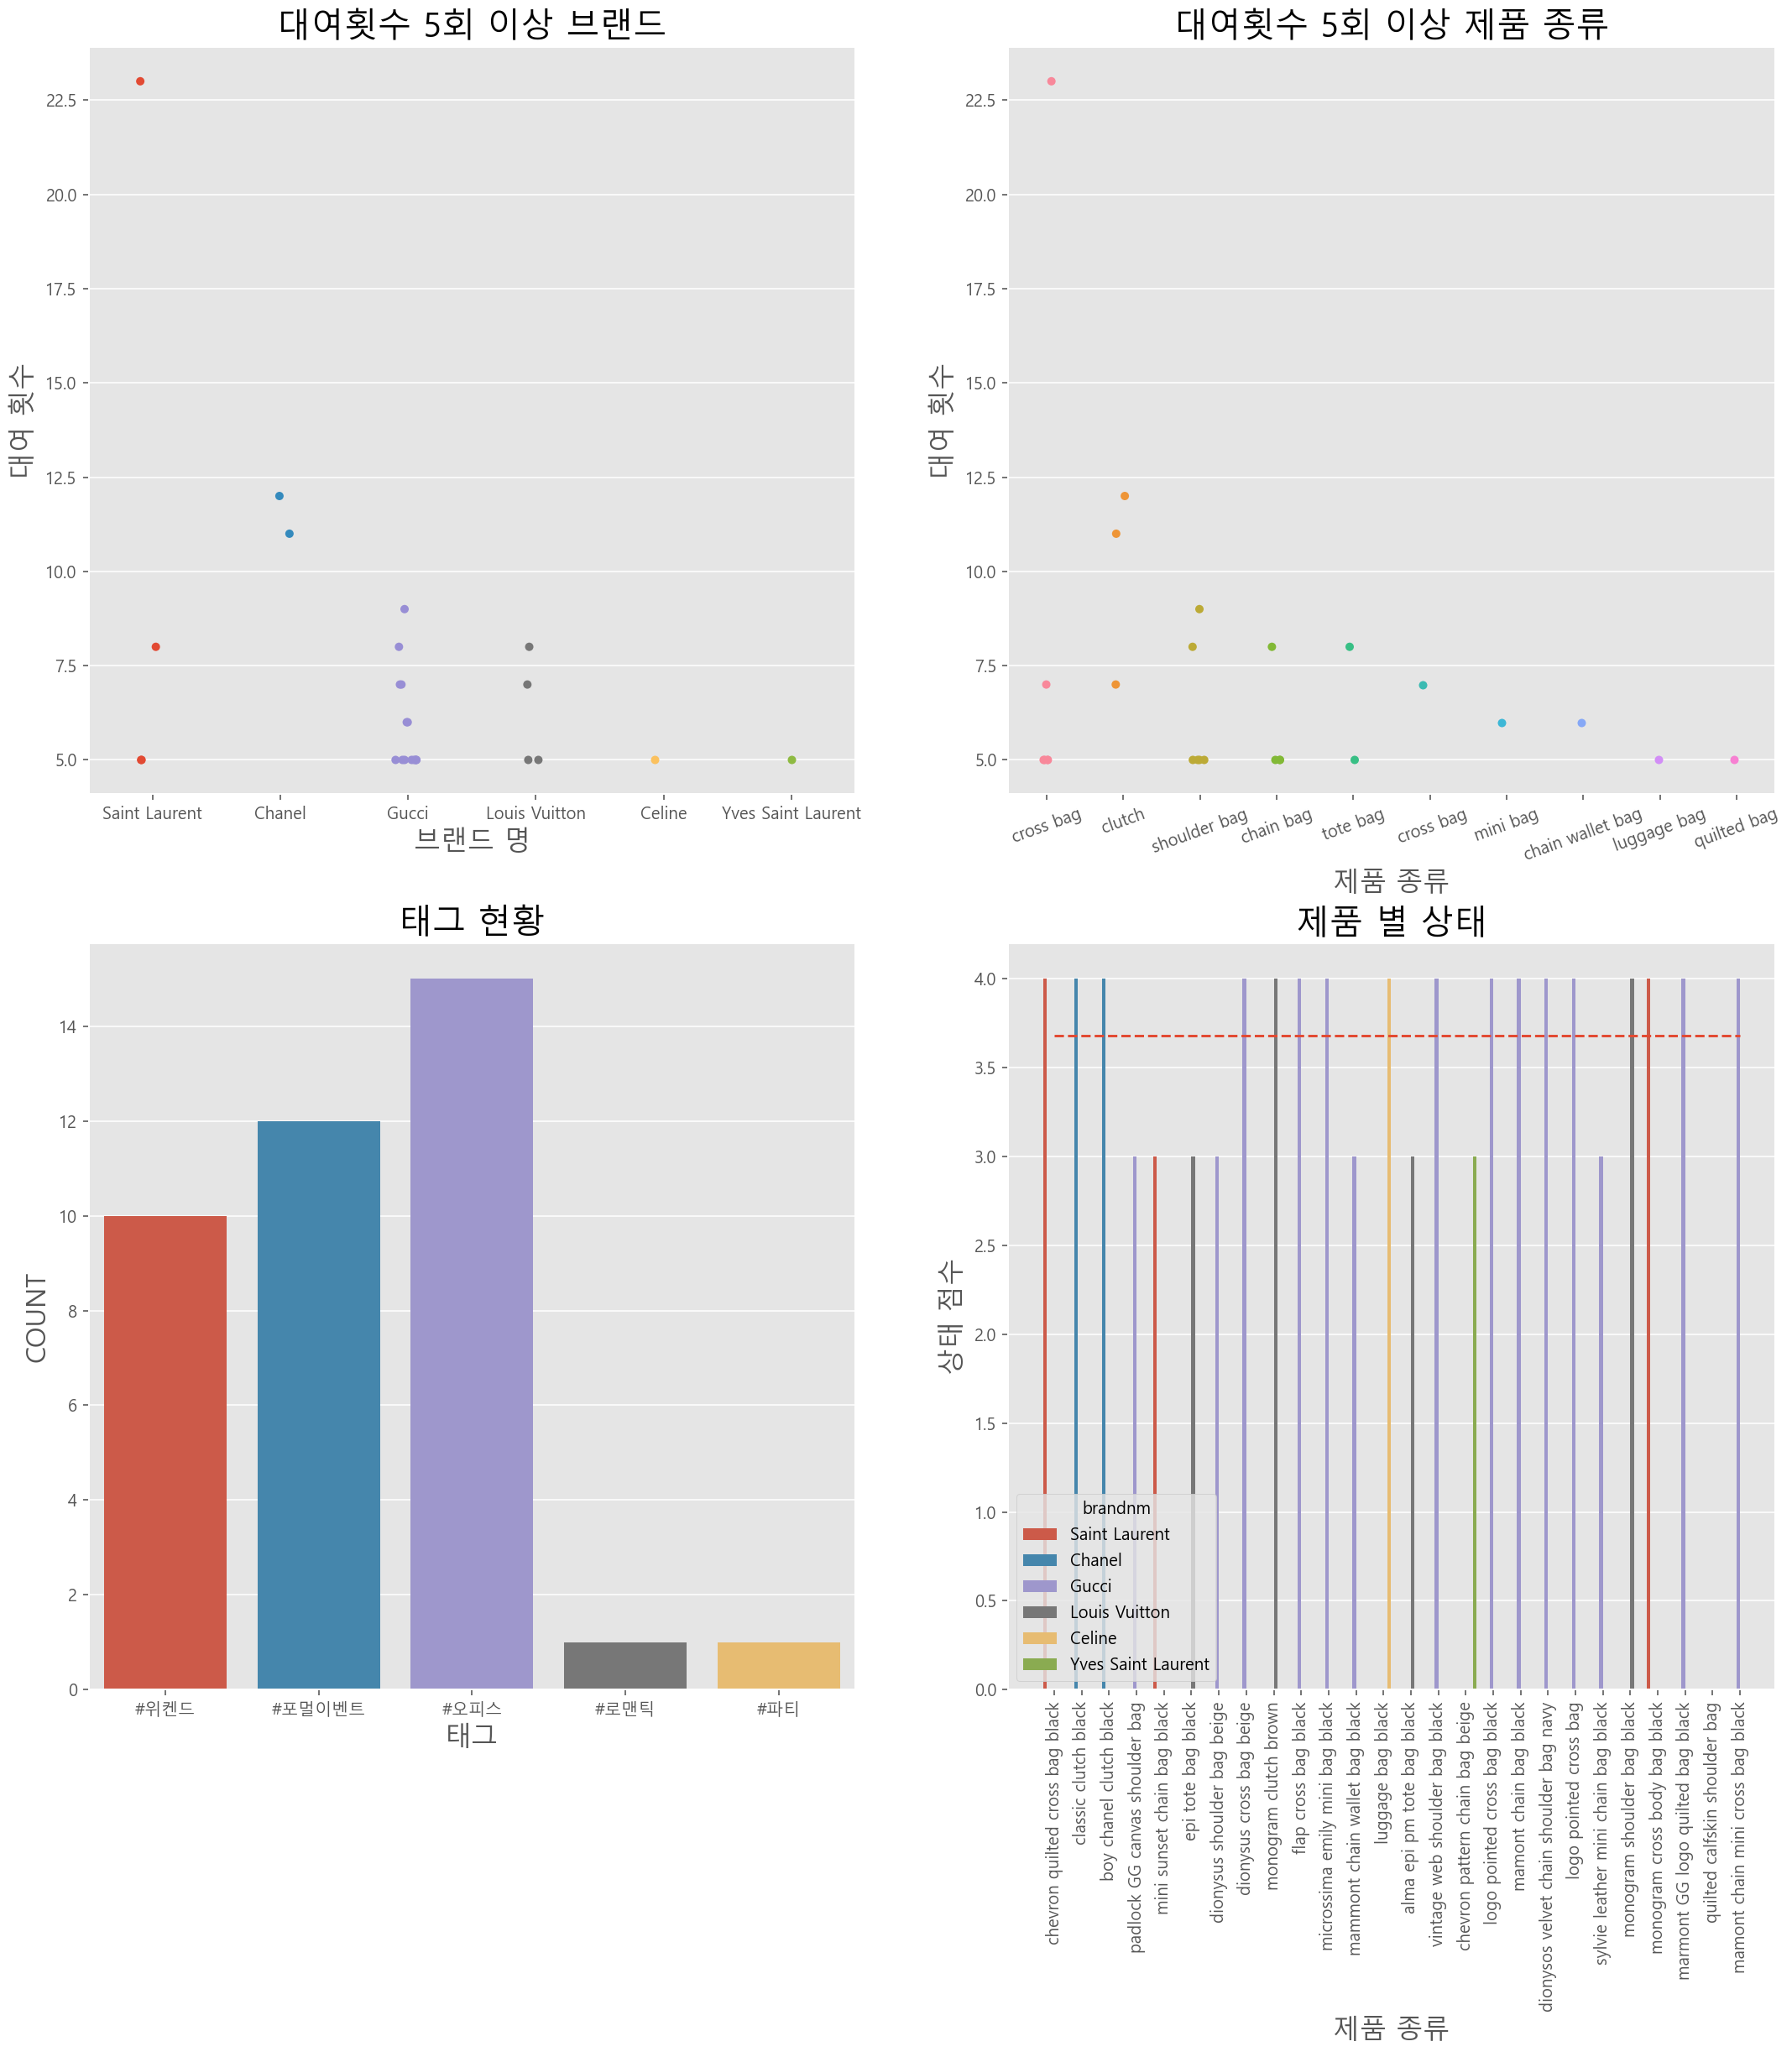

In [12]:
fig = plt.figure(figsize=(18,18))
gs = GridSpec(2,2)

sns.stripplot(x=df_add['brandnm'], y=df_add['Record Count'], ax=fig.add_subplot(gs[0,0]),)
plt.xlabel('Î∏åÎûúÎìú Î™Ö', fontsize=16)
plt.ylabel('ÎåÄÏó¨ ÌöüÏàò', fontsize=16)
plt.title('ÎåÄÏó¨ÌöüÏàò 5Ìöå Ïù¥ÏÉÅ Î∏åÎûúÎìú', fontsize=20)

sns.stripplot(x=df_add['Í∞ÄÎ∞©Ï¢ÖÎ•ò'], y=df_add['Record Count'], ax=fig.add_subplot(gs[0,1]))
plt.xlabel('Ï†úÌíà Ï¢ÖÎ•ò', fontsize=16)
plt.ylabel('ÎåÄÏó¨ ÌöüÏàò', fontsize=16)
plt.xticks(rotation=20)
plt.title('ÎåÄÏó¨ÌöüÏàò 5Ìöå Ïù¥ÏÉÅ Ï†úÌíà Ï¢ÖÎ•ò', fontsize=20)

sns.barplot(data=df_add, x='goodsnm', y='ÏÉÅÌÉú', hue='brandnm' ,ax=fig.add_subplot(gs[1,1]))
plt.xlabel('Ï†úÌíà Ï¢ÖÎ•ò', fontsize=16)
plt.ylabel('ÏÉÅÌÉú Ï†êÏàò', fontsize=16)
plt.plot(df_add['goodsnm'],[df_add['ÏÉÅÌÉú'].mean()]*df_add.shape[0], '--')
plt.xticks(rotation=90)
plt.title('Ï†úÌíà Î≥Ñ ÏÉÅÌÉú', fontsize=20)

tag = ['#ÏúÑÏºÑÎìú', '#Ìè¨Î©ÄÏù¥Î≤§Ìä∏', '#Ïò§ÌîºÏä§', '#Î°úÎß®Ìã±', '#ÌååÌã∞']
df_hashtag = pd.DataFrame(index=tag, columns = ['count'])
df_hashtag.loc['#Ïò§ÌîºÏä§', 'count'] = 15
df_hashtag.loc['#Ìè¨Î©ÄÏù¥Î≤§Ìä∏', 'count'] = 12
df_hashtag.loc['#ÏúÑÏºÑÎìú', 'count'] = 10
df_hashtag.loc['#Î°úÎß®Ìã±', 'count'] = 1
df_hashtag.loc['#ÌååÌã∞', 'count'] = 1

sns.barplot(x=df_hashtag.index, y=df_hashtag['count'],  ax=fig.add_subplot(gs[1,0]))
plt.xlabel('ÌÉúÍ∑∏', fontsize=16)
plt.ylabel('COUNT', fontsize=16)
plt.title('ÌÉúÍ∑∏ ÌòÑÌô©', fontsize=20)

plt.show()